# Compute Drawdons

In [2]:
import pandas as pd
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header = 0, index_col = 0,
                     parse_dates = True, na_values= -99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [3]:
%matplotlib inline

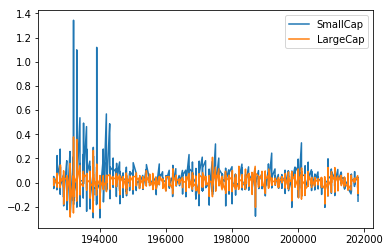

In [4]:
rets.plot.line()

In [5]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [6]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [7]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [8]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [9]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [10]:
rets.tail()

,SmallCap,LargeCap
2018-08,0.0241,0.0234
2018-09,-0.0168,0.0087
2018-10,-0.1002,-0.0657
2018-11,-0.0365,0.0253
2018-12,-0.1531,-0.0890


In [11]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [12]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute drawdons

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown - which is the wealth as a percentage of the previous peak

In [31]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()

In [32]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

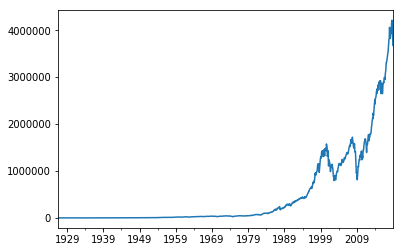

In [33]:
wealth_index.plot.line()

In [36]:
previous_peaks = wealth_index.cummax()

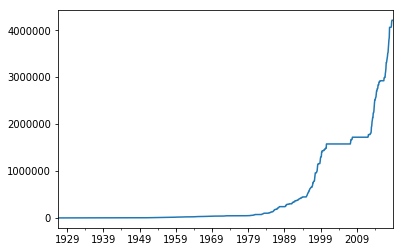

In [37]:
previous_peaks.plot.line()

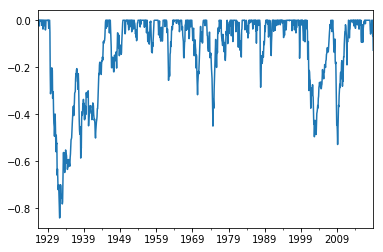

In [38]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot()

In [39]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [40]:
drawdown.min()

-0.8400375277943123

In [42]:
drawdown["1975":].min()

-0.5280945042309304

In [43]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [44]:
drawdown.idxmin()

Period('1932-05', 'M')

In [45]:
# create a function that will automatically create drawdown

def drawdown(returns_series: pd.Series):
    """
    doc string -->
    Takes a time series of assets returns
    Computes and returns a dataFraùe that contains:
    the wealth index
    the previous peaks
    percentage drawdons
    """
    wealth_index = 1000*(1+returns_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    return pd.DataFrame({
        "Wealth":wealth_index,
        "Peaks":previous_peaks,
        "Drawdown":drawdowns
    })

In [46]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [47]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


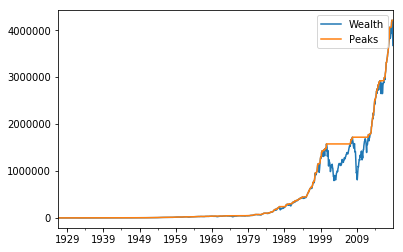

In [48]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].plot()

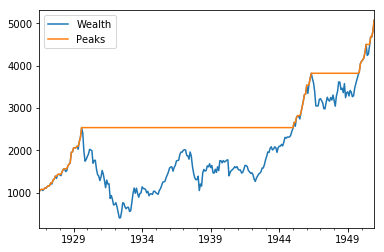

In [51]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth", "Peaks"]].plot()

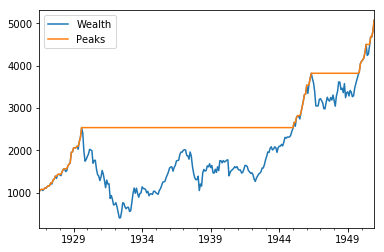

In [52]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]][:"1950"].plot()

In [54]:
drawdown(rets["LargeCap"])

,Wealth,Peaks,Drawdown
1926-07,1.032900e+03,1.032900e+03,0.000000
1926-08,1.071117e+03,1.071117e+03,0.000000
1926-09,1.078294e+03,1.078294e+03,0.000000
1926-10,1.052091e+03,1.078294e+03,-0.024300
1926-11,1.080498e+03,1.080498e+03,0.000000
...,...,...,...
2018-08,4.175915e+06,4.175915e+06,0.000000
2018-09,4.212246e+06,4.212246e+06,0.000000
2018-10,3.935501e+06,4.212246e+06,-0.065700
2018-11,4.035069e+06,4.212246e+06,-0.042062


In [60]:
drawdown(rets["LargeCap"])["Drawdown"].min()

-0.8400375277943123

In [59]:
drawdown(rets["SmallCap"])["Drawdown"].min()

-0.8330007793945303

In [61]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [62]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [64]:
drawdown(rets["1940":]["SmallCap"])["Drawdown"].idxmin()

Period('1974-12', 'M')

In [68]:
drawdown(rets["1940":]["SmallCap"])["Drawdown"].min()

-0.7000596091967917

In [69]:
drawdown(rets["1975":]["SmallCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [70]:
drawdown(rets["1975":]["SmallCap"])["Drawdown"].min()

-0.6312068077252386

In [71]:
drawdown(rets["1975":]["LargeCap"])["Drawdown"].min()

-0.5280945042309303

In [72]:
drawdown(rets["1975":]["LargeCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [13]:
# create a function that will automatically create drawdown

def drawdown_v2(returns_series: pd.Series):
    """
    doc string -->
    Takes a time series of assets returns
    Computes and returns a dataFraùe that contains:
    the wealth index
    the previous peaks
    percentage drawdons
    """
    wealth_index = 1000*(1+returns_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    pd.DataFrame({
        "Wealth":wealth_index,
        "Peaks":previous_peaks
    }).plot()
    
    return pd.DataFrame({
        "Wealth":wealth_index,
        "Peaks":previous_peaks,
        "Drawdown":drawdowns
    })

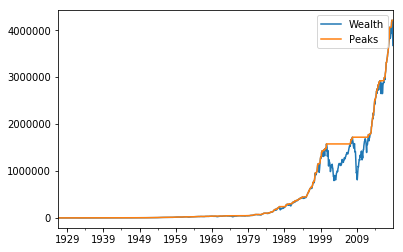

In [17]:
pouf = drawdown_v2(rets["LargeCap"])

In [18]:
pouf

,Wealth,Peaks,Drawdown
1926-07,1.032900e+03,1.032900e+03,0.000000
1926-08,1.071117e+03,1.071117e+03,0.000000
1926-09,1.078294e+03,1.078294e+03,0.000000
1926-10,1.052091e+03,1.078294e+03,-0.024300
1926-11,1.080498e+03,1.080498e+03,0.000000
...,...,...,...
2018-08,4.175915e+06,4.175915e+06,0.000000
2018-09,4.212246e+06,4.212246e+06,0.000000
2018-10,3.935501e+06,4.212246e+06,-0.065700
2018-11,4.035069e+06,4.212246e+06,-0.042062
